In [ ]:
import train
from pickletools import optimize
import models
import util
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from torchvision import transforms, models
import torch
import random
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from models import ImageDatasetISO, DnCNN
from train import trainEpoch, validateEpoch
import plot

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
trainDataset = ImageDatasetISO("../data/train/PolyU/cropped/noisy", "../data/train/PolyU/cropped/mean", mode="train")
testDataset = ImageDatasetISO("../data/test/CC/512/noisy", "../data/test/CC/512/mean", mode="test")
trainingDataLoader = DataLoader(dataset=trainDataset, batch_size=32, shuffle=True, pin_memory=True, drop_last=True, num_workers=4)
testingDataLoader = DataLoader(dataset=testDataset, batch_size=1, shuffle=True, pin_memory=True, drop_last=False)

# model declaration and hyperparameters
model = DnCNN().to(device)
criterion = nn.L1Loss().to(device)
lr = 1e-4
optimizer = optim.Adam(model.parameters(), lr=lr)

In [ ]:
num_epochs = 50000
for epoch in range(1, num_epochs + 1):
    trainEpoch(epoch, model, criterion, optimizer, trainingDataLoader)
    if epoch % 1000 == 0:
        validateEpoch(epoch, model, testingDataLoader)
        model_out_path = "../models/dncnn-iso/dncnn_epoch_{}.pth".format(epoch)
        model.save(model_out_path, epoch, optimizer)
        
        test_imgs = []
        zoom_params = []
        test_imgs.append({ 
            "img_H": np.asarray(Image.open("../data/test/CC/512/mean/5dmark3_iso3200_1.png")),
            "img_L": np.asarray(Image.open("../data/test/CC/512/noisy/5dmark3_iso3200_1.png")),
        })
        zoom_params.append(plot.ZoomParams(xpos=130, ypos=260, size=100))
        test_imgs.append({ 
            "img_H": np.asarray(Image.open("../data/test/CC/512/mean/d600_iso3200_1.png")),
            "img_L": np.asarray(Image.open("../data/test/CC/512/noisy/d600_iso3200_1.png")),
        })
        zoom_params.append(plot.ZoomParams(xpos=280, ypos=260, size=100))
        test_imgs.append({ 
            "img_H": np.asarray(Image.open("../data/test/CC/512/mean/d800_iso3200_1.png")),
            "img_L": np.asarray(Image.open("../data/test/CC/512/noisy/d800_iso3200_1.png")),
        })
        zoom_params.append(plot.ZoomParams(xpos=50, ypos=160, size=100))
        plot.makeSamplePlotISO(model, test_imgs, f"DnCNN[ISO] - epoch {epoch}", zoomParams=zoom_params, figLocation=f"../figures/dncnn-iso_epochs/dncnn-iso_epoch_{epoch}")

In [ ]:
model_test = DnCNN()
model_test.load_state_dict(torch.load("../models/dncnn-r/dncnn_epoch_25000.pth")['state_dict'])
model_test.eval()
model_test.cuda()

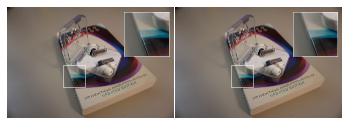

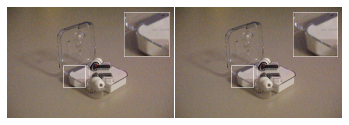

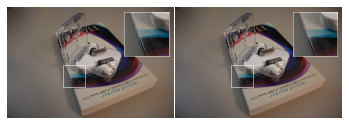

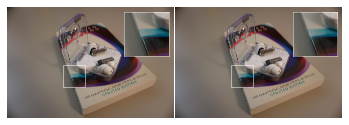

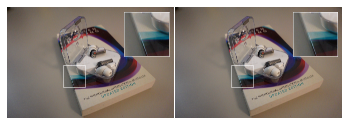

In [6]:
scanned = plot.scanFolder("../data/real/headphones", "../figures/dncnn-f_tests/headphones/dncnn-iso_{}.png")
imgs = []
for file in scanned["input"]:
    imgs.append(np.asarray(Image.open(file)))
paths = scanned["output"]
zoomParams = [
    plot.ZoomParams(2000,2100,800),
    plot.ZoomParams(2000,2100,800),
    plot.ZoomParams(2000,2100,800),
    plot.ZoomParams(2000,2100,800),
    plot.ZoomParams(2000,2100,800),
    plot.ZoomParams(2000,2100,800),
    plot.ZoomParams(2000,2100,800),
    plot.ZoomParams(2000,2100,800),
    plot.ZoomParams(2000,2100,800),
    plot.ZoomParams(2000,2100,800),
    plot.ZoomParams(2000,2100,800),
]
plot.makePlotRealISO(imgs, model_test, paths, zoomParams)